In [932]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import seaborn as sns

In [933]:
kon = 1e5
factor = 1
koff = 1e-4
delta_1 = 1
delta_2 = delta_1
rmax_a = 1e6
rmax_b = 1e6/factor
Amax = 2
t_end = 30*60
rho_a = 1
rho_b = rmax_a/rmax_b

In [934]:
def model(t, z, k):
    dA10 = k*rho_a*z[3]*(1 - z[0] - z[1] - z[2]) - delta_1*k*rho_b*z[4]*z[0] + koff*z[2]*(1-z[4]) - koff*z[0]*(1-z[3])
    dA01 = k*rho_b*z[4]*(1-z[0]-z[1]-z[2]) - koff*z[1]*(1-z[4]) - delta_2*k*rho_a*z[3]*z[1] + koff*z[2]*(1-z[3])
    dA11 = delta_1*k*rho_b*z[4]*z[0] + delta_2*k*rho_a*z[3]*z[1] - koff*z[2]*(1-z[4]) - koff*z[2]*(1-z[3])
    dr0a = -k*rho_a*(1-z[0]-z[1]-z[2])*z[3] + koff*z[0]*(1-z[3]) - delta_2*k*rho_a*z[3]*z[1] + koff*z[2]*(1-z[3])
    dr0b = -k*rho_b*(1-z[0]-z[1]-z[2])*z[4] + koff*z[1]*(1-z[4]) - delta_1*k*rho_b*z[0]*z[4] + koff*z[2]*(1-z[4])

    dz = [dA10, dA01, dA11, dr0a, dr0b]

    return dz

In [935]:
def model_nums(t, z, k):
    dA10 = (k*(rho_a)*(z[3]/(rmax_a + rmax_b))*(Amax - z[0] - z[1] - z[2]) - delta_1*k*(rho_b)*(z[4]/(rmax_b + rmax_a))*z[0] + koff*z[2]*((rmax_b-z[4])/(rmax_b + rmax_a))- koff*z[0]*((rmax_a-z[3])/(rmax_a + rmax_b)))
    dA01 = (k*(rho_b)*(z[4]/(rmax_a + rmax_b))*(Amax-z[0]-z[1]-z[2]) - koff*z[1]*((rmax_b-z[4])/(rmax_a + rmax_b)) - delta_2*k*(rho_a)*(z[3]/(rmax_a + rmax_b))*z[1] + koff*z[2]*((rmax_a-z[3])/(rmax_a + rmax_b)))
    dA11 = (delta_1*k*(rho_b)*(z[4]/(rmax_a + rmax_b))*z[0] + delta_2*k*(rho_a)*(z[3]/(rmax_a + rmax_b))*z[1] - koff*z[2]*((rmax_b-z[4])/(rmax_a + rmax_b)) - koff*z[2]*((rmax_a-z[3])/(rmax_a + rmax_b)))
    dr0a = (-k*(rho_a)*((Amax-z[0]-z[1]-z[2])/Amax)*z[3] + koff*(z[0]/Amax)*(rmax_a-z[3]) - delta_2*k*(rho_a)*z[3]*(z[1]/Amax) + koff*(z[2]/Amax)*(rmax_a-z[3]))
    dr0b = (-k*rho_b*((Amax-z[0]-z[1]-z[2])/Amax)*z[4] + koff*(z[1]/Amax)*(rmax_b-z[4]) - delta_1*k*rho_b*(z[0]/Amax)*z[4] + koff*(z[2]/Amax)*(rmax_b-z[4]))

    dz = [dA10, dA01, dA11, dr0a, dr0b]

    return dz

In [936]:
def model_nums_dynamic_rho(t, z, k):
    dA10 = k*(z[3]*rho_a/rmax_a)*(z[3])*(Amax - z[0] - z[1] - z[2]) - delta_1*k*(z[4]*rho_b/rmax_b)*(z[4])*z[0] + koff*z[2]*((rmax_b-z[4])/rmax_b)- koff*z[0]*((rmax_a-z[3])/rmax_a)
    dA01 = k*(z[4]*rho_b/rmax_b)*(z[4]/rmax_b)*(Amax-z[0]-z[1]-z[2]) - koff*z[1]*((rmax_b-z[4])/rmax_b) - delta_2*k*(z[3]*rho_a/rmax_a)*(z[3]/rmax_a)*z[1] + koff*z[2]*((rmax_a-z[3])/rmax_a)
    dA11 = delta_1*k*(z[4]*rho_b/rmax_b)*(z[4]/rmax_b)*z[0] + delta_2*k*(z[3]*rho_a/rmax_a)*(z[3]/rmax_a)*z[1] - koff*z[2]*((rmax_b-z[4])/rmax_b) - koff*z[2]*((rmax_a-z[3])/rmax_a)
    dr0a = -k*(z[3]*rho_a/rmax_a)*((Amax-z[0]-z[1]-z[2])/Amax)*z[3] + koff*(z[0]/Amax)*(rmax_a-z[3]) - delta_2*k*(z[3]*rho_a/rmax_a)*z[3]*(z[1]/Amax) + koff*(z[2]/Amax)*(rmax_a-z[3])
    dr0b = -k*(z[4]*rho_b/rmax_b)*((Amax-z[0]-z[1]-z[2])/Amax)*z[4] + koff*(z[1]/Amax)*(rmax_b-z[4]) - delta_1*k*(z[4]*rho_b/rmax_b)*(z[0]/Amax)*z[4] + koff*(z[2]/Amax)*(rmax_b-z[4])

    dz = [dA10, dA01, dA11, dr0a, dr0b]

    return dz

In [937]:
t = np.geomspace(1e-12, t_end, 10000)
t_span = [0, t_end]
z0 = [0, 0, 0, rmax_a, rmax_b]

In [938]:
powers = [12, 11, 10, 9, 8, 7, 6]
vals = [1, 2, 3, 4, 5 ,6, 7, 8, 9]
A0s = []
for i in range(len(powers)):
    for j in range(len(vals)):
        A0s.append(vals[j]/(10**powers[i]))


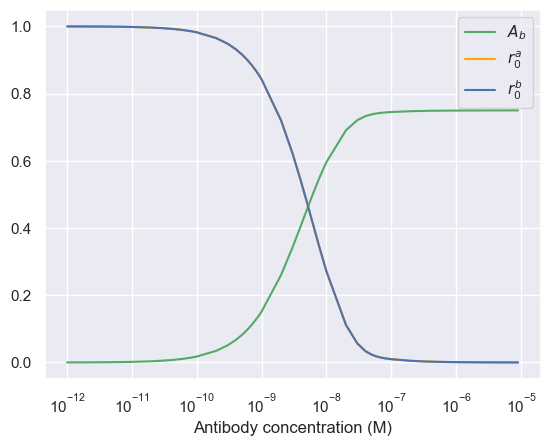

In [939]:
Ab_vals = np.zeros(len(A0s))
r0a_vals = np.zeros(len(A0s))
r0b_vals = np.zeros(len(A0s))
for i in range(len(A0s)):
    k = kon*A0s[i]
    z = solve_ivp(model_nums, t_span, z0, method="Radau", t_eval=t, args=(k, ))

    Ab = (z.y[0] + z.y[1] + z.y[2])/Amax
    r0a = z.y[3]/rmax_a
    r0b = z.y[4]/rmax_b

    Ab_vals[i] = Ab[-1]
    r0a_vals[i] = r0a[-1]
    r0b_vals[i] = r0b[-1]

sns.set_theme()
plt.plot(A0s, Ab_vals, label = r'$A_b$', color='g')
plt.plot(A0s, r0a_vals, label = r'$r_0^a$', color='orange')
plt.plot(A0s, r0b_vals, label = r'$r_0^b$',color='b')
plt.xscale('log')
plt.legend(loc='best')
plt.xlabel('Antibody concentration (M)')
plt.show()

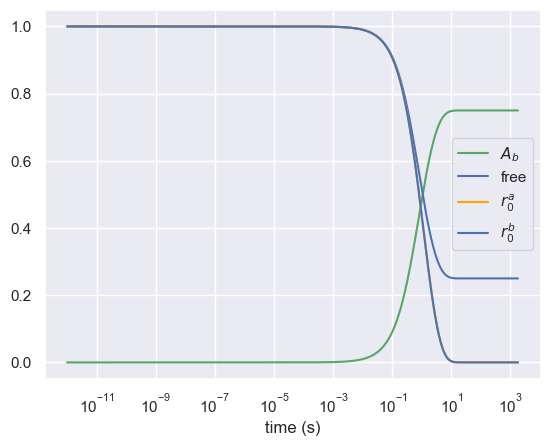

In [940]:
k= 1e-5*kon
z = solve_ivp(model_nums, t_span, z0, method="Radau", t_eval=t, args=(k, ))


Ab = (z.y[0] + z.y[1] + z.y[2])/Amax
r0a = z.y[3]/rmax_a
r0b = z.y[4]/rmax_b
plt.plot(t, Ab, label = r'$A_b$', color='g')
#plt.plot(t, z.y[0]/Amax, label = r'$A_{10}$')
#plt.plot(t, z.y[1]/Amax, label = r'$A_{01}$')
#plt.plot(t, z.y[2]/Amax, label = r'$A_{11}$')
plt.plot(t, (Amax - z.y[0] - z.y[1] - z.y[2])/Amax, label='free')
plt.plot(t, r0a, label = r'$r_0^a$', color='orange')
plt.plot(t, r0b, label = r'$r_0^b$',color='b')
plt.xscale('log')
plt.legend(loc='best')
plt.xlabel('time (s)')
plt.show()

In [941]:
print(r0a)

[1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 9.99700128e-05
 9.99700128e-05 9.99700128e-05]


In [942]:
kon = 1e5
factor = 1
koff = 1e-4
rho_a = 1
rho_b = 1*factor
delta_1 = 1
delta_2 = delta_1
rmax_a = 1e6
rmax_b = 1e6/factor
Amax = rmax_a + rmax_b
t_end = 40*60

In [943]:
t = np.geomspace(1e-8, t_end, 10000)
t_span = [0, t_end]
z0 = [0, 0, 0, rmax_a, rmax_b]

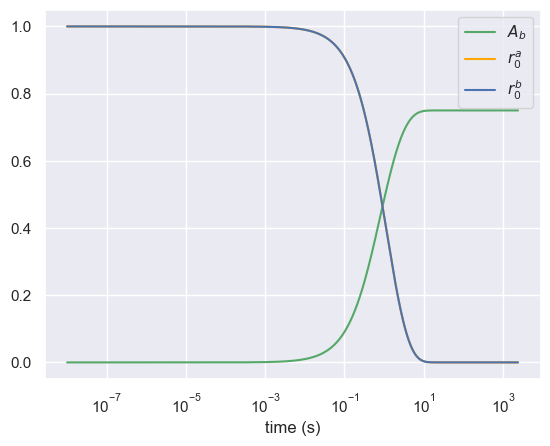

In [944]:
k= 1e-5*kon
z = solve_ivp(model_nums, t_span, z0, method="Radau", t_eval=t, args=(k, ))


Ab = (z.y[0] + z.y[1] + z.y[2])/Amax
r0a = z.y[3]/rmax_a
r0b = z.y[4]/rmax_b
plt.plot(t, Ab, label = r'$A_b$', color='g')
plt.plot(t, r0a, label = r'$r_0^a$', color='orange')
plt.plot(t, r0b, label = r'$r_0^b$',color='b')
plt.xscale('log')
plt.legend(loc='best')
plt.xlabel('time (s)')
plt.show()